# Self Organizing Map

Self Organizing Map is a powerful yet simple Unsupervised algorithm that can be used for a variety of applications. 

* One of the common application for SOM is to take in un-labelled input data and convert that into a low dimensional, discretized classification of the input data.

* It looks in an input data with many many variables and reduces it.

* It is a type of Artificial Neural network that combines many layers with back propagation to continously correct the mapping leading to a more and more accurate map of the data.

It is a great way of understanding some of the un-realized correlations in the data and produce some really awesome maps of the data. 

1. In this project, we would be taking a look at a random bank's customer information applying for a credit card. THe variables correspond to the information a customer provides during the application. 
2. The goal is to identify which customer cheated.
3. Since this is an unsupervised deep learning model, we do not have a label or a target variable

This data set is taken from [data_location](http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

    Lets take a look at the data.

In [1]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('Credit_Card_Applications.csv')

# The class variable here corresponds to whether the application was approved or not. 
# It is available in this dataset as a way for us to check the metrics.

dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


All these rows corresponding to customers are our input. So there are 15 variables, some being categorical and some continous.

The SOM, uses these input as input to a neural network to map it to an output space. And in between the input space and output space, the neural network gets initialized with the vector of the columns corresponding to each customer.

So based on these each neuron will have 15 input signals.

Next, for each of these inputs, the output will be the neuron which is physically closest to the customer, based on euclidean distance.

Then we can use a gaussian neighbourhood function to update the weights to each neuron in the neighbourhood, in essence pulling it closer to the customer's neuron.

The above steps happen to each customer, many many times and in the process the neighbourhood distance keeps decreasing little by little, until it cannot any more.

The result would/should be that the fraud transactions would end up being the outliers.

Lets put that theory to test..

### Creating Test Set and Training Set

* Step 2: After importing hte data, lets split the data into train and test dataset
* Step 3: We need to feature scale the dataset by normalizing it 

In [3]:
X=dataset.iloc[:,0:15].values
Y=dataset.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
x_norm=sc.fit_transform(X)

### Training the dataset

Lets start training the model using the training dataset. Here we will be using the MiniSom implementation
The MiniSom uses the following parameters:

1. x & y --> the dimensions of the grid. This is based on our requirements. It must not be too small otherwise we lose clarity. Higher the dimention, more the accuracy.

2. input_dims --> the dimentions from the input (here 15)

3. sigma --> the radius of the different neighbouhood.

4. learning_rate --> hyper parameter that decides by how much should the weights need to be updated. Higher the value, faster the convergence but lesser the accuracy




In [6]:
from minisom import MiniSom
SOM=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.50)

In [7]:
# Initializing small initial weights
SOM.random_weights_init(X)
SOM.train_random(data=X,num_iteration=100)

### Visualization

Now lets visualize the results and plot the SOM. Since this is a special kind of plot we will have to build it from scratch. Pyplot from matplotlib alone might not be enough for this

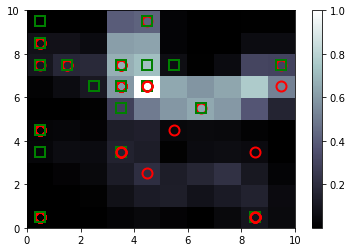

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import bone, pcolor, colorbar, plot, show
bone()  # This creates a window and pops the plot in it
pcolor(SOM.distance_map().T) # this is to depict different colors to depict different means of the data
colorbar() # this adds the legend

# lets also add some colors
markers=['o','s'] # this is used to mark the approve =0,1 with a circle or a square respectively
colors=['r','g'] # Used to color non approval with a red color and approval with a green

# together red circle are not approved and green squares are approvals

for i,x in enumerate(X):
    w=SOM.winner(x)
    plot(w[0] +0.5,w[1] +0.5,markers[Y[i]],markeredgecolor=colors[Y[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
show()

## Interpretation

From the plot above, the following can be interpreted:

1. The white zones are the ones which are outlier customers and dark zones are not.

2. The green squares are the applications that were approved and the red circles are the applications that were rejected.

3. The "Aha Moment" from the plot above are the green squares in the white zones. These denote the fraud cases of the customers whose applications were approved and should not be.



### Reverse Mapping to get back the customers with "Fraud Applications"

In [9]:
mappings=SOM.win_map(X)
frauds=np.concatenate((mappings[(4,6)],mappings[(4,7)]),axis=0)
frauds=sc.inverse_transform(frauds)
pd.DataFrame(frauds).to_csv('Fraud_applications.csv')

In [ ]:
pd.DataFrame(frauds)

In [10]:
frauds

array([[  3.93789228e+12,   0.00000000e+00,   1.50468000e+03,
          1.58620000e+02,   5.00000000e+00,   1.44000000e+02,
          3.30000000e+01,   7.36725000e+01,   1.00000000e+00,
          1.00000000e+00,   4.69000000e+02,   0.00000000e+00,
          5.00000000e+00,   2.58000000e+05,   3.25800001e+08],
       [  3.90489758e+12,   1.00000000e+00,   2.71232000e+03,
          1.40000000e+02,   5.00000000e+00,   1.05000000e+02,
          3.30000000e+01,   1.42500000e+02,   1.00000000e+00,
          1.00000000e+00,   4.69000000e+02,   0.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   3.06600001e+08],
       [  3.94959033e+12,   0.00000000e+00,   3.80957000e+03,
          5.46000000e+02,   5.00000000e+00,   1.05000000e+02,
          3.30000000e+01,   1.56750000e+02,   1.00000000e+00,
          1.00000000e+00,   4.69000000e+02,   0.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   3.00100001e+08],
       [  3.91820889e+12,   1.00000000e+00,   2.62387500e+03,
     